In [80]:
# Import the relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.cluster import KMeans
%matplotlib inline

plt.rc("font", size=18)
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)


In [81]:
# Import data 
demo_df = pd.read_csv('segmentation data.csv', index_col = 0)
demo_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [82]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [83]:
sum(demo_df.duplicated())

0

In [84]:
demo_df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [85]:
# Correlation Estimate - correlation describes the linear dependency between variables.
demo_df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


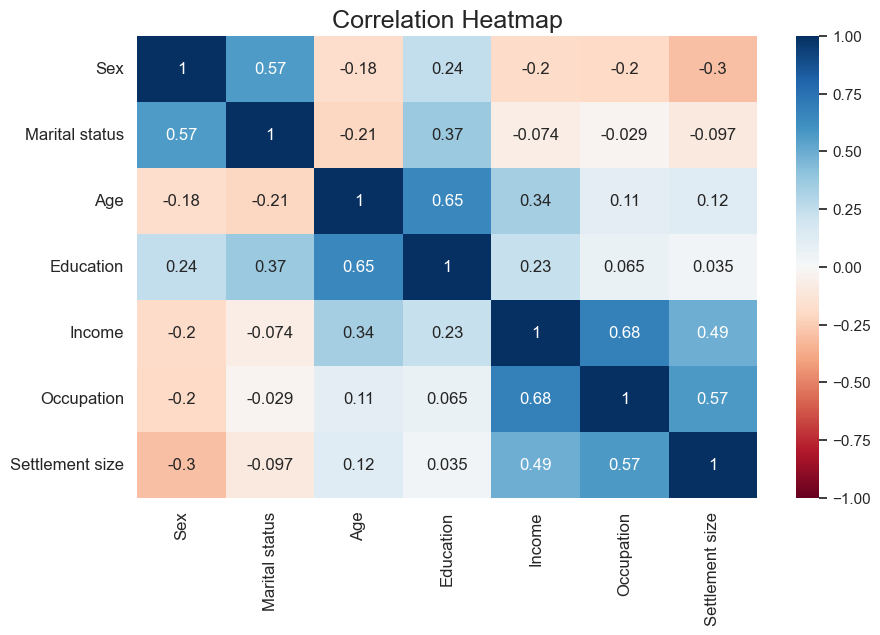

In [18]:
#Correlation in Heatmap form 

plt.figure(figsize=(10,6))
s = sns.heatmap(demo_df.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax=1)
# different color sets = 'viridis', 'autumn', 'rainbow'
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize =12) 
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize =12) 
plt.title('Correlation Heatmap', fontsize =18)
plt.show()

In [86]:
from sklearn.preprocessing import StandardScaler 

In [87]:
scaler = StandardScaler()
demo_scaled = scaler.fit_transform(demo_df)

In [88]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [55]:
hier_clust = linkage(demo_scaled, method = 'ward')

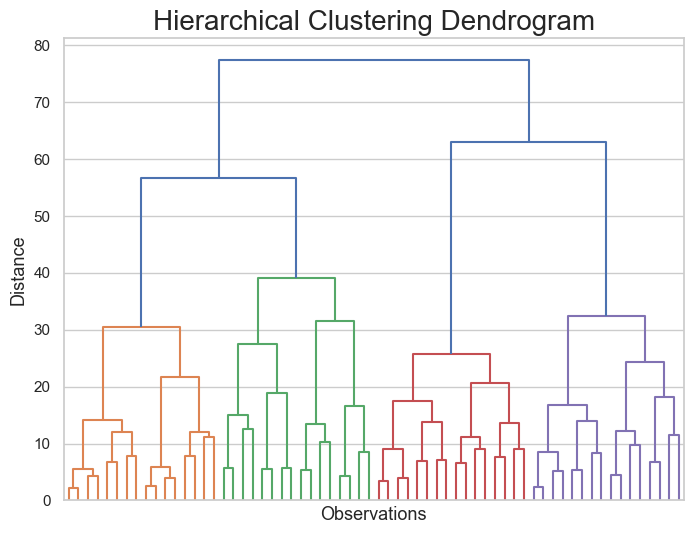

In [23]:
plt.figure(figsize =(8,6))
plt.title('Hierarchical Clustering Dendrogram', fontsize =20)
plt.ylabel('Distance',  fontsize =13)
plt.xlabel('Observations',  fontsize =13)
dendrogram(hier_clust, show_leaf_counts =False,
           truncate_mode = 'level', 
           p = 5, 
           no_labels = True, 
           # color_threshold = 0 : the clusters differrent color 
          )

plt.show()

In [89]:
# Import the relevant library
from sklearn.cluster import KMeans

In [90]:
wcss = {}
for i in range(1, 11): 
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans.fit(demo_scaled)
    wcss[i] = kmeans.inertia_

Text(0.5, 1.0, 'K-means Clustering - Elbow Method')

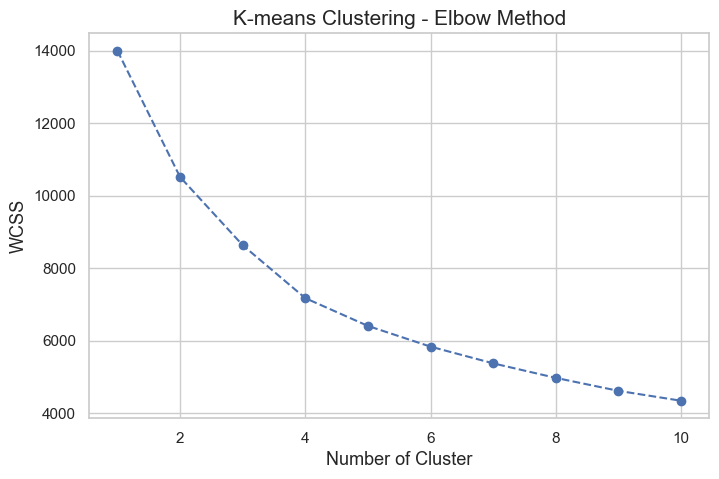

In [26]:
# Elbow method
plt.figure(figsize =(8,5))
plt.plot(list(wcss.keys()), list(wcss.values()),  marker = 'o', linestyle = '--' )

plt.xlabel('Number of Cluster', fontsize = 13)
plt.ylabel('WCSS', fontsize = 13)
plt.title('K-means Clustering - Elbow Method', fontsize = 15)

In [27]:
kmeans =KMeans(n_clusters =4, max_iter = 500,  init = 'k-means++', random_state= 42)

In [28]:

kmeans.fit(demo_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=500, n_clusters=4, random_state=42)

In [29]:
#k-mens clustring
df_segm_kmeans = demo_df.copy()

In [30]:
df_segm_kmeans['Segment_KMeans'] = kmeans.labels_
df_segm_kmeans['Segment_KMeans'].replace({0: "A", 1: "B", 2: "C", 3:"D"}, inplace=True)

In [31]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment_KMeans']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment_KMeans,,,,,,,
A,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
B,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
C,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
D,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


In [32]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N_Obs'] = df_segm_kmeans[['Segment_KMeans', 'Sex']].groupby(['Segment_KMeans'])['Sex'].count()
df_segm_analysis['Prop_Obs'] = df_segm_analysis.N_Obs / df_segm_analysis.N_Obs.sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_Obs,Prop_Obs
Segment_KMeans,,,,,,,,,
A,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
B,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
C,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
D,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [33]:
df_segm_analysis.rename({'A':'well_off', 'B': 'fewer_opportunities', 
                         'C': 'career_oriented', 'D': 'standard' }, inplace =True)

In [34]:

df_segm_kmeans['Labels']  = df_segm_kmeans['Segment_KMeans'].map({'A':'well_off', 'B': 'fewer_opportunities', 
                         'C': 'career_oriented', 'D': 'standard' })

In [35]:
from sklearn.decomposition import PCA 

In [36]:
pca = PCA() # So let the PCA variable be an instance of the PCA class.
pca.fit(demo_scaled)

PCA()

In [37]:
# Explained variance proportion of each component.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

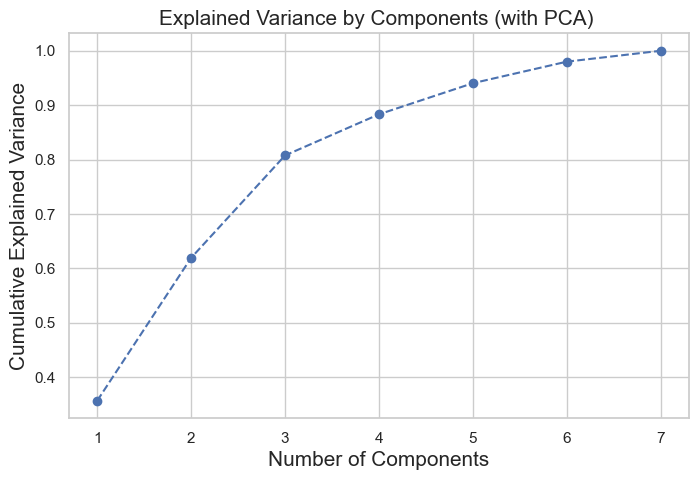

In [38]:
plt.figure(figsize =(8,5))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components (with PCA) ', fontsize= 15)
plt.xlabel('Number of Components', fontsize= 15)
plt.ylabel('Cumulative Explained Variance', fontsize= 15)

In [39]:
pca= PCA(n_components =3)
pca.fit(demo_scaled)

PCA(n_components=3)

In [40]:
# We can obtain more information about the three components with the help of the components attribute of PCA.
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [41]:
df_pca_comp = pd.DataFrame(data = pca.components_, columns =demo_df.columns.values, 
                          index = ['component_1', 'component_2', 'component_3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component_1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component_2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component_3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


NameError: name 'df' is not defined

Text(0.5, 1.0, 'Loadings')

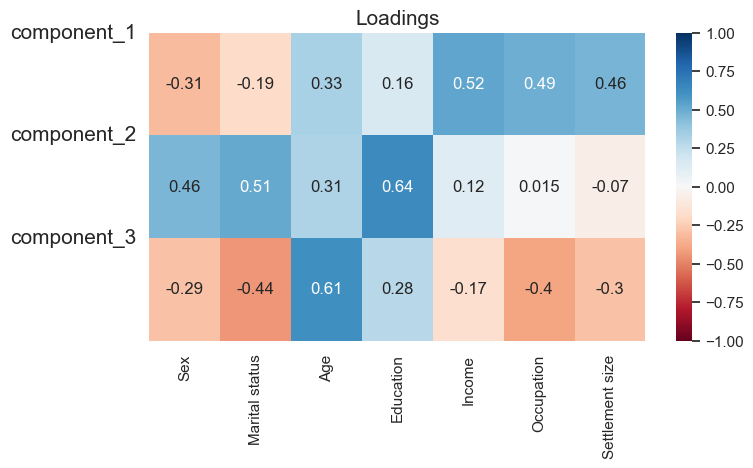

In [42]:
plt.figure(figsize=(8,4))
sns.heatmap(df_pca_comp, vmin = -1, vmax = 1, cmap = 'RdBu', annot = True)
plt.yticks([0,1,2], ['component_1', 'component_2', 'component_3'],rotation = 0, fontsize = 15 )
plt.title('Loadings',  fontsize = 15 )

In [56]:
scores_pca = pca.transform(demo_scaled)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

Text(0.5, 1.0, 'K-means Clustering with PCA clustering')

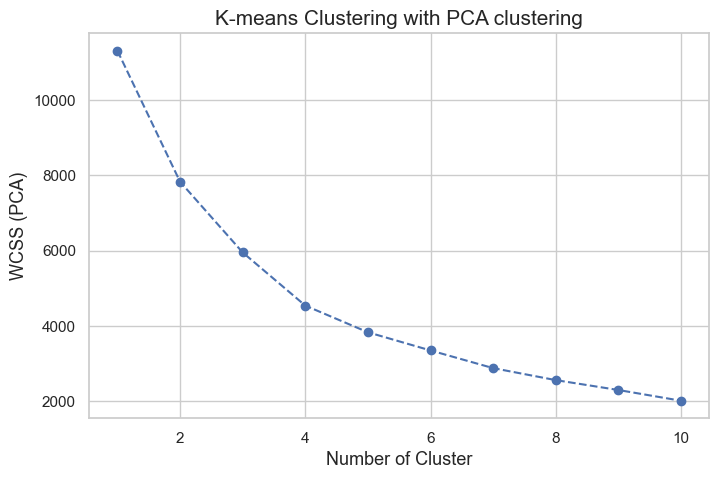

In [58]:
# Elbow method
plt.figure(figsize =(8,5))
plt.plot(list(wcss_pca.keys()), list(wcss_pca.values()),  marker = 'o', linestyle = '--' )

plt.xlabel('Number of Cluster', fontsize = 13)
plt.ylabel('WCSS (PCA)', fontsize = 13)
plt.title('K-means Clustering with PCA clustering', fontsize = 15)

Text(0.5, 1.0, "Distribution of Customer's Age")

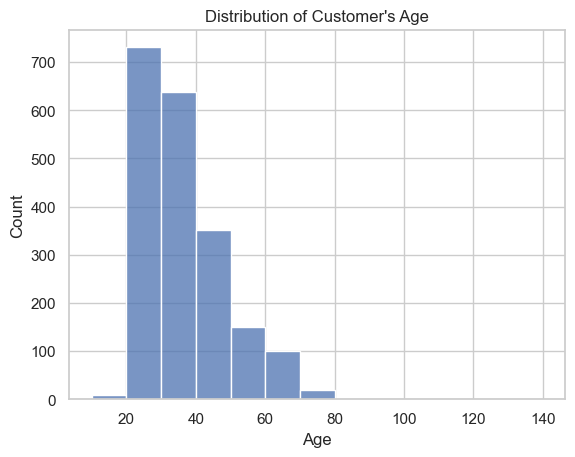

In [77]:
sns.histplot(data=demo_df, x="Age", bins = list(range(10, 150, 10)))
plt.title("Distribution of Customer's Age")

In [5]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age']);
     


NameError: name 'plt' is not defined